In [82]:
import numpy as np
import astropy.io.fits as pf
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as ss
from scipy.optimize import curve_fit

In [101]:
new_data = np.load('simple_correlation_10000_x_y_01234.npy')

In [102]:
x = new_data[0,:]
y = new_data[1,:]

In [103]:
def condition(x_i,x_c):
    return np.where(x_i==x_c)[0]
def calculate_y(x_m,y_m,c): 
    return np.mean(y_m[condition(x_m,c)])-np.mean(y_m[condition(x_m,0)])

In [126]:
boostrap_time = 200
boostrap_error = []
propagate_error = []
for j in range(1,5):
    boostrap_value = []
    search = np.where(x==0)[0]
    y_0_err = np.std(y[search])/np.sqrt(len(search))
    search_i = np.where(x==j)[0]
    y_i_err = np.std(y[search_i])/np.sqrt(len(search_i))
    
    for i in range(boostrap_time):
        random_index = np.random.randint(0,len(x),len(x))
        y_mod = y[random_index]
        x_mod = x[random_index]
        boostrap_value.append(calculate_y(x_mod,y_mod,j))
    boostrap_error.append(np.std(boostrap_value))
    propagate_error.append(np.sqrt(y_i_err**2+y_0_err**2))
print(boostrap_error)
print(propagate_error)

[0.31118284893614095, 0.29412982291817674, 0.3079393080082553, 0.3112526523083725]
[0.31497545029801116, 0.3205193253670118, 0.3169106197181442, 0.31961733705660983]


In [125]:
delta_y = []
for j in range(1,5):
    delta_y.append(np.mean(y[condition(x,j)])-np.mean(y[condition(x,0)]))   

Text(0, 0.5, '<$\\Delta y$>')

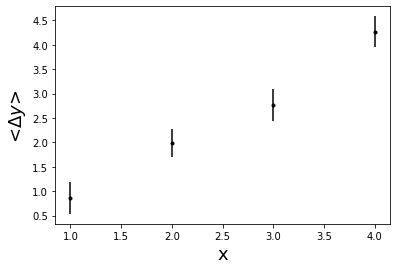

In [106]:
x_axis=[1,2,3,4]
plt.errorbar(x_axis,delta_y,boostrap_error,fmt='.k')
plt.xlabel("x",fontsize=18)
plt.ylabel("<$\Delta y$>",fontsize=18)

In [84]:
def fuc(x,a,b):
    return a*x+b

In [85]:
best_fit_parameter, pcov=curve_fit(fuc,x_axis,delta_y)

In [86]:
best_fit_parameter

array([ 1.10032036, -0.27848562])

Text(0, 0.5, '<$\\Delta y$>')

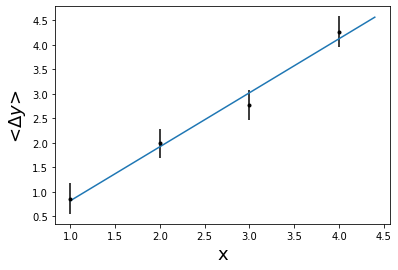

In [127]:
plt.plot(np.arange(1,4.5,0.1),fuc(np.arange(1,4.5,0.1),*best_fit_parameter))
plt.errorbar(x_axis,delta_y,boostrap_error,fmt='.k')
plt.xlabel("x",fontsize=18)
plt.ylabel("<$\Delta y$>",fontsize=18)